In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

## Load Data

In [2]:
df = pd.read_csv('data/buy/acad1Buy3ML10years.txt', delimiter= '\s+', header = None)

In [3]:
osc = df.iloc[:, 0:41]
stk = df.iloc[:, 41:82]
macd = df.iloc[:, 82:123]
rtn = df.iloc[:, 123]
label = np.sign(rtn)
label = label.map({1: 1, -1: 0, 0:0})
results = label.map({1: 'EARN', -1: 'LOSS', 0: 'LOSS'})

## EDA

In [4]:
def EDA(index, osc_ind = True, stk_ind = True, macd_ind = True):
    
    if osc_ind:
        # plot Oscillator
        plt.figure(figsize=(12,4))
        plt.plot(range(41),  osc.iloc[index,:])
        plt.legend()
        plt.gca().invert_xaxis()
        plt.ylabel("Oscillator")
        plt.xlabel("Time")
        plt.title("Oscillator 3-Day Time Series")
        plt.show()

    if stk_ind:
        # plot stock price
        plt.figure(figsize=(12,4))
        plt.plot(range(41),  stk.iloc[index,:])
        plt.legend()
        plt.gca().invert_xaxis()
        plt.ylabel("Stock Price")
        plt.xlabel("Time")
        plt.title("Stock Price 3-Day Time Series")
        plt.show()
    
    if macd_ind:
        # plot MACD
        plt.figure(figsize=(12,4))
        plt.plot(range(41),  macd.iloc[index,:])
        plt.legend()
        plt.gca().invert_xaxis()
        plt.ylabel("MACD")
        plt.xlabel("Time")
        plt.title("MACD 3-Day Time Series")
        plt.show()

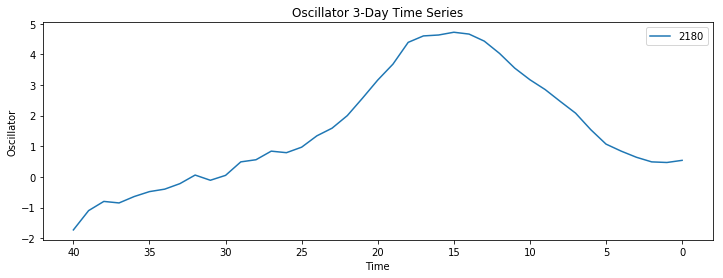

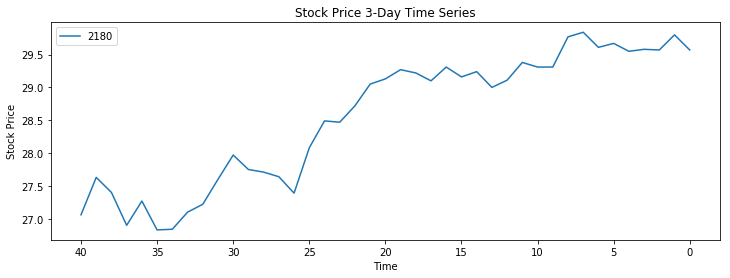

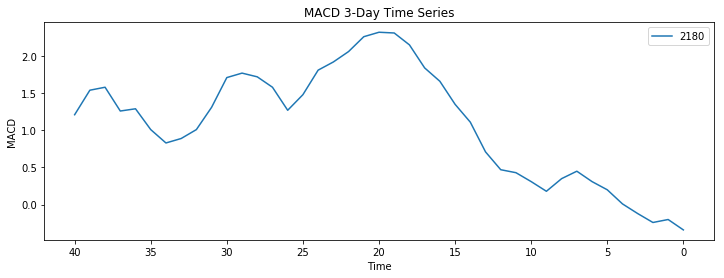

LOSS, -0.24


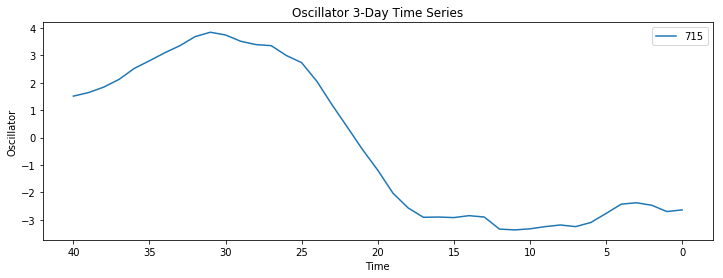

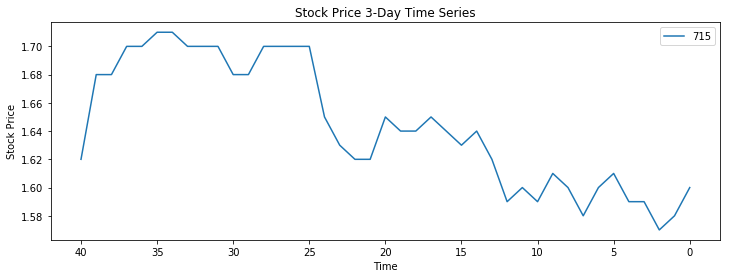

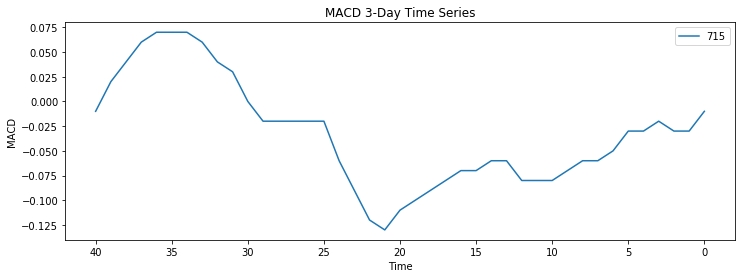

EARN, 6.87


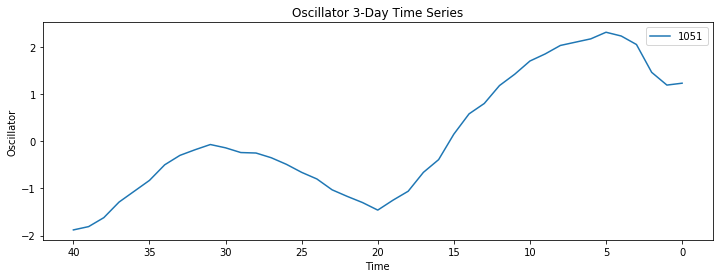

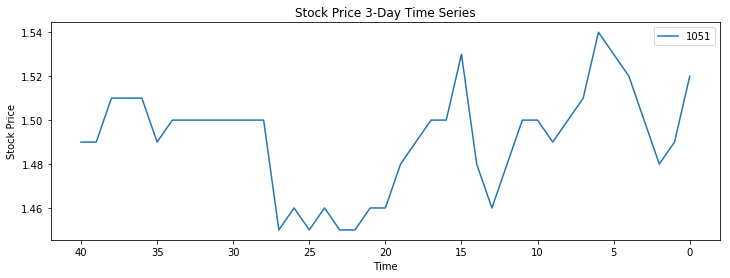

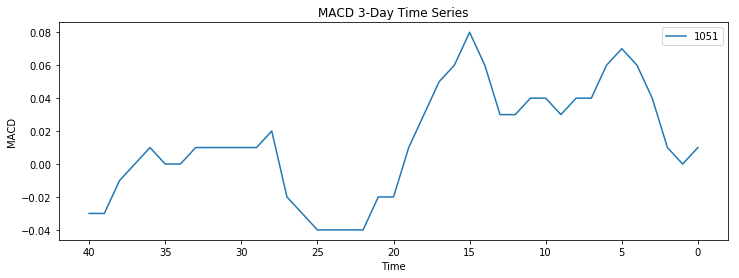

LOSS, -0.66


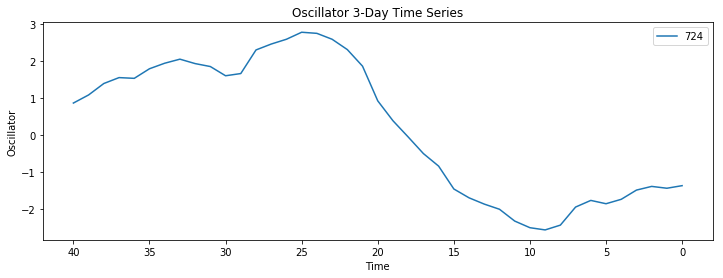

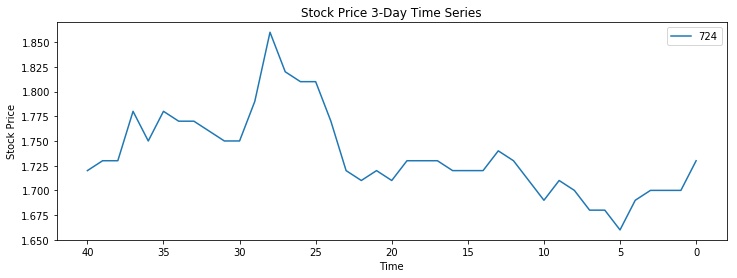

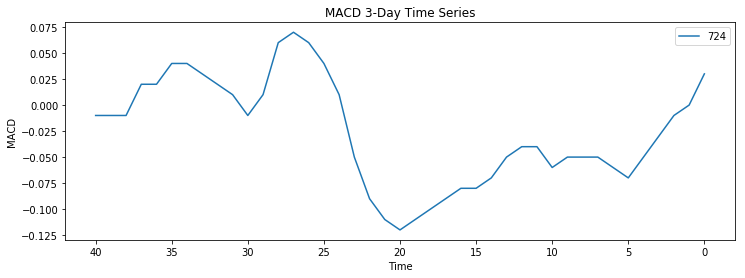

EARN, 0.58


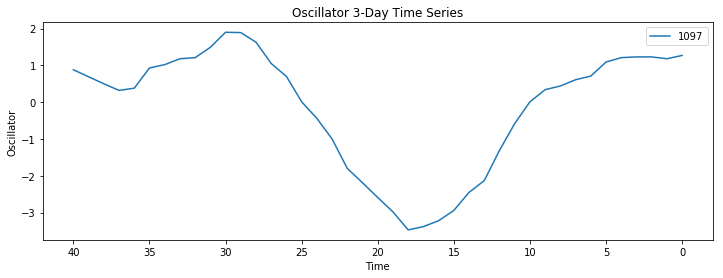

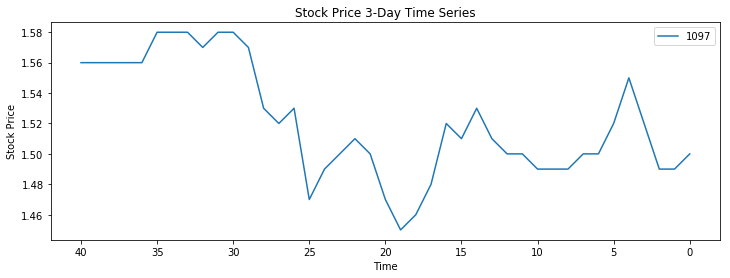

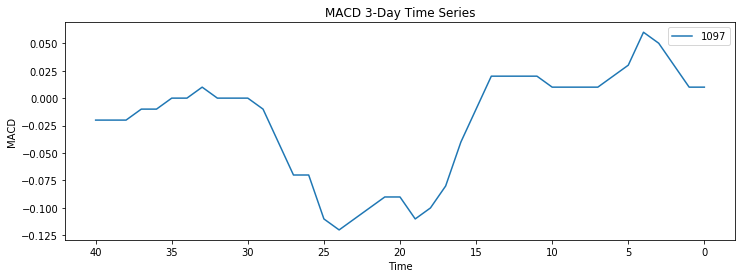

LOSS, 0.0


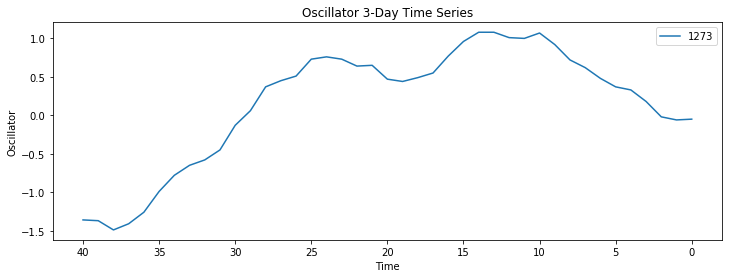

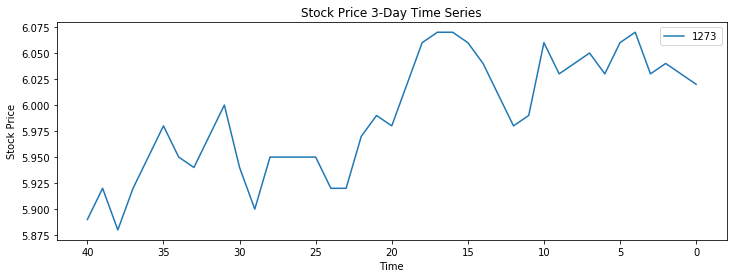

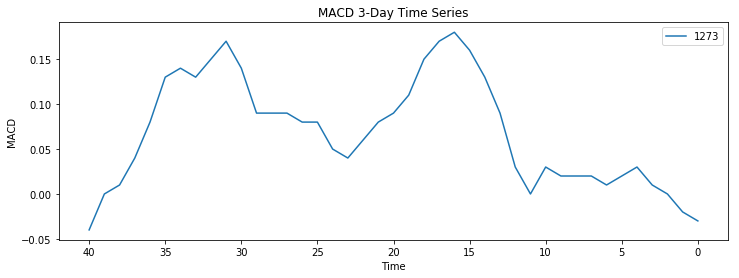

LOSS, -0.5


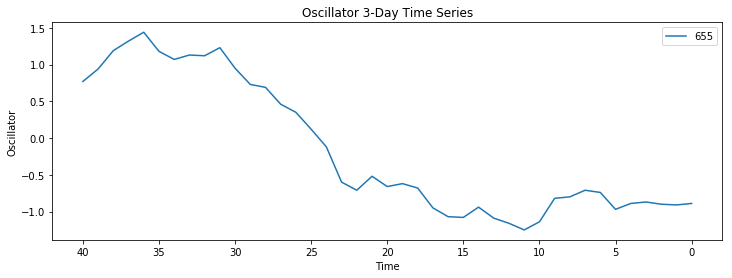

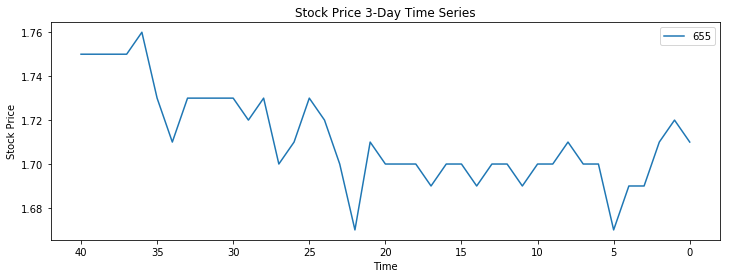

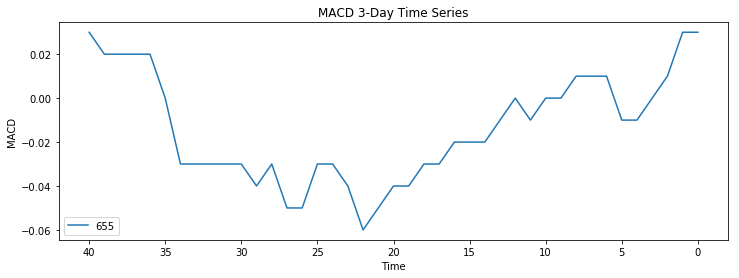

LOSS, -1.75


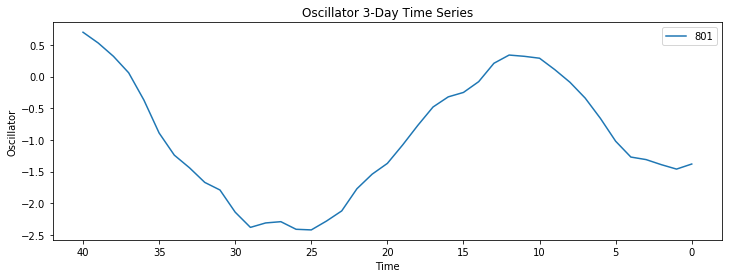

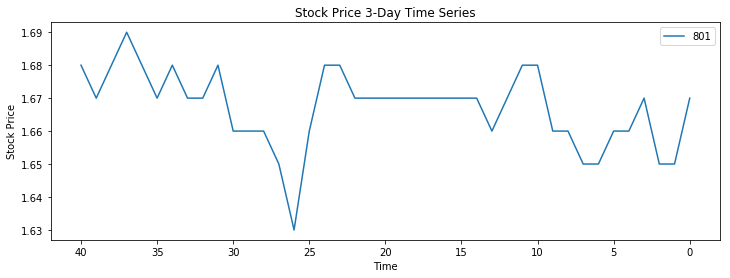

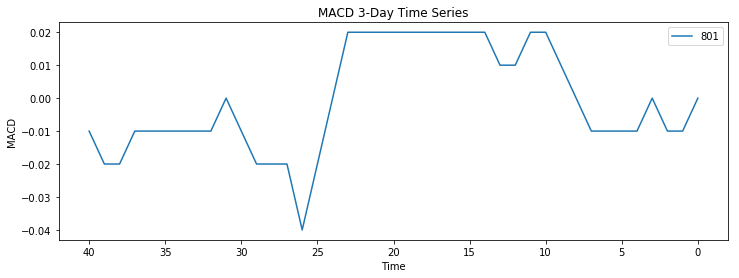

EARN, 0.6


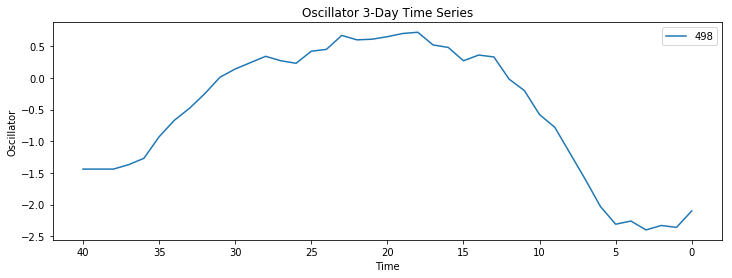

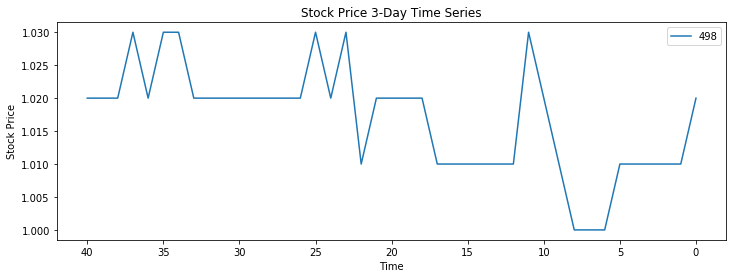

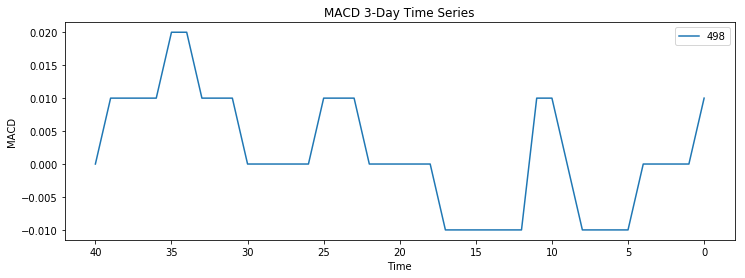

EARN, 1.96


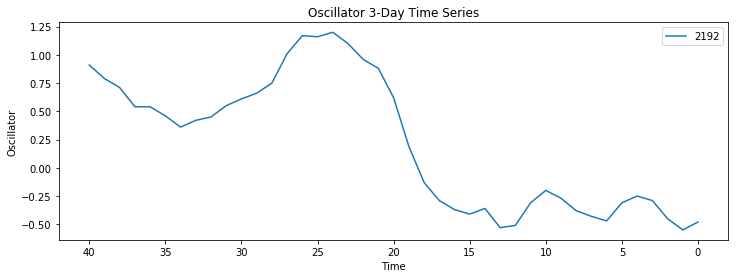

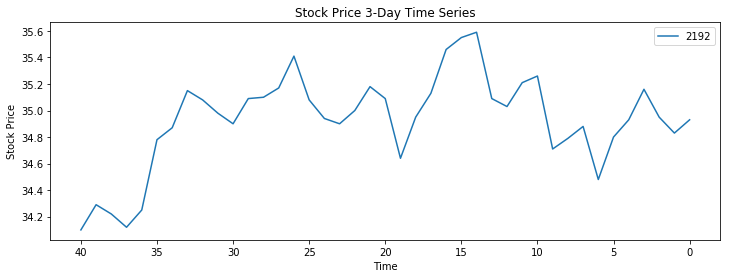

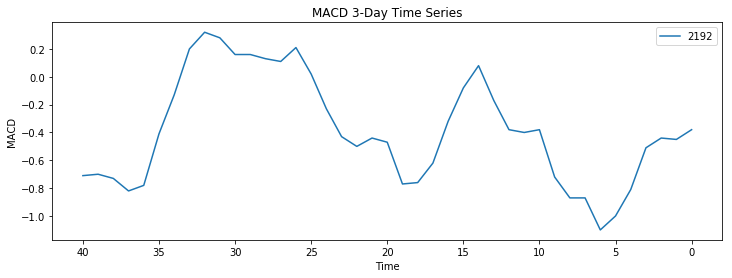

LOSS, -0.06


In [5]:
for i in range(10):
    index = random.randint(0,len(df))
    EDA(index)
    if label[index] == 1:
        TCOL =  '\033[1;32m' # Green Text 
    else:
        TCOL = '\033[1;31m' # Red Text
    print (TCOL + results[index] + ", " + str(rtn[index]))

## Dataset Split

In [48]:
Feature_matrix_w_rtn = pd.concat([osc, stk, macd, rtn], axis=1)

#Split test set
X, X_test, y, y_test = train_test_split(Feature_matrix_w_rtn, label, test_size=0.2, random_state=777)

#Extract the return column from X_test, for percentage yield calculation
X_test_return = X_test.iloc[:,123]
X_test = X_test.iloc[:, 1:123]
X = X.iloc[:, 1:123]

#Split train/validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=888)

## Baseline Model - Logistic Regression with Feature Selection

In [49]:
# Feature Selection using RFE 
training_scores = []
validation_scores = []

k_range = range(1, 15)
for k in k_range:
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = k)
    rfe.fit(X_train, y_train)
    training_scores.append(rfe.score(X_train, y_train))
    validation_scores.append(rfe.score(X_valid, y_valid))

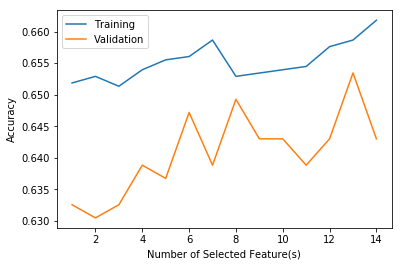

In [50]:
#Plot scores by number of feature(s)
plt.plot(k_range, training_scores, label="Training")
plt.plot(k_range, validation_scores, label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of Selected Feature(s)")
plt.show()

In [63]:
#Trim Data to only the selected features
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 13)
rfe.fit(X_train, y_train)
X_train_trimmed = rfe.transform(X_train)
X_valid_trimmed = rfe.transform(X_valid)
X_test_trimmed = rfe.transform(X_test)

#Fit Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_trimmed, y_train)
print("Training accuracy: ", round(lr.score(X_train_trimmed, y_train),4))
print("Validation accuracy: ", round(lr.score(X_valid_trimmed, y_valid),4))
print("Test accuracy: ", round(lr.score(X_test_trimmed, y_test),4))

#Print result
print("Return profit if we follow this model: ", sum(lr.predict(X_test_trimmed)*X_test_return), "%")

Training accuracy:  0.6587
Validation accuracy:  0.6534
Test accuracy:  0.6494
Return profit if we follow this model:  -9.009999999999998 %
